In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [6]:
pd.set_option('display.max_colwidth', None)

In [16]:
# bank_statement = './data/bank/20240725-20241117-3860.csv'
# bank_statement = './data/bank/20241001-20241201-3860.csv'
# bank_statement = './data/bank/2024-01-01--2024-12-31--Transactions.csv'
# bank_statement = './data/bank/2025-01-01--2025-03-13--Transactions.csv'
bank_statement = './data/bank/2025-04-01--2025-08-01--Transactions.csv'

In [17]:
from datetime import date, datetime
from dateutil.parser import parse

def handle_date(value):
    return datetime.strptime(value, "%d/%m/%Y")


def handle_description(value):
    return value.lower().strip()


df = pd.read_csv(
    bank_statement,
    converters={
        "Date": handle_date,        
        "Description": handle_description,        
    },
)

df["year"] = df.apply(lambda row: row["Date"].year, axis=1)
df["month"] = df.apply(lambda row: row["Date"].month, axis=1)


In [18]:
df.head()

,Date,Description,Amount,Balance,year,month
0,2025-08-01,fourth floor 90 hi,2237.17,3541.93,2025,8
1,2025-08-01,octopus,-265.14,1304.76,2025,8
2,2025-08-01,gocardless,-118.00,1569.90,2025,8
3,2025-07-31,spuds at spurs london,-25.00,1687.90,2025,7
4,2025-07-31,sumup *coffee joilondon,-8.10,1712.90,2025,7


In [20]:
df.dtypes

Date           datetime64[ns]
Description            object
Amount                float64
Balance               float64
year                    int64
month                   int64
dtype: object

In [21]:
df[df.Description.str.contains("napo limited")]

,Date,Description,Amount,Balance,year,month


In [22]:
bakery = df[df.Description.str.contains("coffee joi")]
bakery

,Date,Description,Amount,Balance,year,month
4,2025-07-31,sumup *coffee joilondon,-8.1,1712.90,2025,7
104,2025-06-30,sumup *coffee joilondon,-6.0,671.50,2025,6
126,2025-06-23,sumup *coffee joilondon,-9.3,335.85,2025,6
206,2025-06-02,sumup *coffee joilondon,-8.0,984.47,2025,6
297,2025-05-12,sumup *coffee joilondon,-8.1,1291.06,2025,5
435,2025-04-08,sumup *coffee joilondon,-4.7,-30.56,2025,4


In [45]:
bakery.groupby([bakery.year, bakery.month]).Amount.sum().abs()

year  month
2025  4         4.7
      5         8.1
      6        23.3
      7         8.1
Name: Amount, dtype: float64

In [40]:
areas = {
    "income": [
        "napo",
        "paystream",
        "fourth floor 90 hi", # Giant umbrella
    ],
    "food": [
        "SAINSBURYS",
        "LOON FUNG LTD",
        "WAITROSE",
        "Wimbledon Market",
        "ENFIELD FOOD CENTR",
        "Coffee JoiLondon",
        "TESCO STORES",
        "WM MORRISONS",
        "LIDL",
    ],
    "pt": [
        "TFL TRAVEL"
    ],
    "utility": [
        "THAMES WATER",
        "VIRGIN MEDIA",
        "EE LIMITED",
        "OCTOPUS",
        "1PASSWORD",
        "BACKBLAZE",
        "Prisilla.S-Cleaner30ChesnutRoad",
        "NOTION LABS"
        "MOONPIG"
    ],
    "car": [
        "Tesla",
        "M6 TOLL",
        "MOTO RUGBY",
        "RUGBY  PRET",
        "FLEET SOUTH",
        "FLEET NORTH"
        "PARK WITH EASE",
        "RINGGO",
        "Weymouth SF ConnecWeymouth",
        "PAY-DARTFORD",
        "FLINT MOUNTAIN",
        "Shell South Weald",
        "SQ *FAST RESPONSE",
        
    ],
    "health": [
        "Kaja PeersLondon",
        "Sano Hair",
        "BUPA PAYMENTS",
        "Nuffield Health"
        "BOOTS",
        "PUREBIO",
        "INTENTIONAL SETS",
        "Holland and Barret",
        "LANDYS CHEMIST",
        "HELLOSELF",
    ],
    "hobby": [
        "ROCKFAX",
        "GOCARDLESS",
        "CASTLE CLIMBING",
        "LODGE DINORWIG",
        "SportsDirect",
        "Absolute-Snow",
        "Tradeinn",
        "Dive Force",
        "SQ *HYPERDIVE LTD",
        "DAVE MACLEOD",
        "Guy Molyneux      Costa Meet Expense",
    ],
    "revolut": [
        "Oisin Mulvihill   OB"
    ],
    "financial": [
        "AIG LIFE LTD",
        "SCOTTISH PROVIDENT",
        "AVIVA",
        "FAREWILL"
    ],
    "repayments": [
        "NOVUNA PERSONAL FI",
        "TESCO BANK",
        "MBNA LOANS",
        "FIRST DIRECT VISA",
        "MBNA LIMITED",
        "F/D CREDIT"
    ],
    "restaurants": [
        "THE UPPER PLACE",
        "indiebeer",
        "Oseyo",
        "Roti King",
        "XINGFUTANG",
        "XING LONG MEN",
        "GOLDEN DRAGON CHIN",
        "Q T RESTAURANT LIMLONDON",
        "BOULANGERINorthwood",
        "The garden house",
        "Queens Head",
        "DING TEA",
        "Little Teapot TaveLondon",
        "PRET A MANGER",
        "PP NOODLE BAR",
        "Kings Oak Loughton",
        "VINEYARD",
        "The Peruvian CorneLondon"
        "DanDan",
        "Boom Battle Bar",
        "BABEL GRILL HOUSE LONDON E1",
        "FORESTRY ENGLAND  TUNBRIDGE WEL"
        "KOREAN BBQ AND VEGLONDON EC1Y",
        "DORSET COUNTY HOSPDORSET",
        "THE KING & THAI   DORCHESTER",
        "BURGER KING",
        "PANOPOLIS",
        "CAMPBELL S        lift",
        "SUNDAY*Plaza Khao London",
        "FUNICULARP* YOELLODUDLEY",
        "HEYTEA",
        "Katsute 100",
        "THE TEA HOUSE",
        "SP PROUD CABARET",
        "MCDONALDS",
        "LIGHT BITE",
        "PRET A MANGER",
        "Brewdog",
    ],
    "travel": [
        "Ryanair",
        "STANSTED EXPRESS",
        "VRBO",
        "Hampton by Hilton",
        "EXPEDIA",
        "AIRALO",
        "TUI INFLI",
        "LGW NORTH",
        "VIATORTRIPADVISOR",
        "AIRPORT PARKING HOCRAWLEY",
        "SPORTSCOVER",
        "HOLIDAY INN",
        "DELTA HOTELS",
        
        
        
    ],
    "mortgage": [
        "Mortgage"
    ],
    "paypal": [
        "PAYPAL PAYMENT"
    ],
    "amazon": [
        "AMZNMktplace", 
        "AMAZON",
    ],
    "google": [
        "GOOGLE"
    ],
        
}

In [41]:
# pattern = "|".join([a.strip().lower() for a in areas['Food']])
# df[df.Description.str.contains(pattern)]

# total unique descriptions:
# df['Description'].nunique()

# list the unique descriptions
df['Description'].unique()

array(['fourth floor 90 hi', 'octopus', 'gocardless',
       'spuds at spurs    london', 'sumup  *coffee joilondon',
       'prisilla.s-cleaner30chesnutroad', 'paypal payment',
       'tfl travel ch     tfl.gov.uk/cp',
       "int'l 1698928652  backblaze inc     san mateo         usd 10.80 @ 1.3516mas rate",
       'ls ismash         london', 'sainsburys s/mkts lowhall 0433',
       'caffe nero tcr - wlondon', 'virgin media pymts', 'ee limited',
       'oisin mulvihill   obafrfywdu6jqbbvr', 'costa coffee 43010london',
       'oisin mulvihill   oba79ff51plcc1aw9', 'aviva',
       'oisin mulvihill   obaxg3tgst4do0bxg', 'honest burger warrlondon',
       'amazon.co.uk*ry4b5amazon.co.uk', 'fd ys wong        support',
       'the rose and crownegham', 'interest          to 26jun2025',
       'university hospitasouthampton', 'revolut**1991*    london',
       'uber   *trip      help.uber.com',
       'tesla inc.        west drayton', 'google *google one650-253-0000',
       'scottish provide

In [42]:
totals = {}

for area in areas:    
    pattern = "|".join([a.strip().lower() for a in areas[area]])
    totals[area] = df[df.Description.str.contains(pattern)].groupby([df.year, df.month]).Amount.sum()

df2 = pd.DataFrame(totals).fillna(0)
df2

income    food     pt  utility     car  health   hobby  revolut  \
year month                                                                     
2025 4         0.00 -398.10 -67.20  -480.47 -138.90  -73.55 -230.98      0.0   
     5      8302.61 -522.20 -71.25  -449.51 -127.99    0.00 -197.00      0.0   
     6      6080.42 -352.76 -43.75  -494.47 -733.88 -265.57 -197.00      0.0   
     7      4696.73 -418.90 -38.10  -539.44  -51.93    0.00 -197.00   -925.0   
     8      2237.17    0.00   0.00  -265.14    0.00    0.00 -118.00      0.0   

            financial  repayments  restaurants  travel  mortgage  paypal  \
year month                                                                 
2025 4        -136.50     -106.12       -59.55   -7.12  -1020.47  -76.74   
     5        -136.50     -754.82        10.70   -4.50  -1026.47  -63.67   
     6         -87.24     -129.66       -40.45  -97.27  -1028.00  -50.48   
     7        -123.85     -134.91       -19.15  -98.09  -1300.00  -84.31   
     8           0.00        0.00         0.00    0.00      0.00    0.00   

            amazon  google  
year month                  
2025 4     -177.46  -30.98  
     5      -63.15 -107.98  
     6     -179.83   -7.99  
     7       -3.44   -7.99  
     8        0.00    0.00

<Axes: xlabel='year,month'>

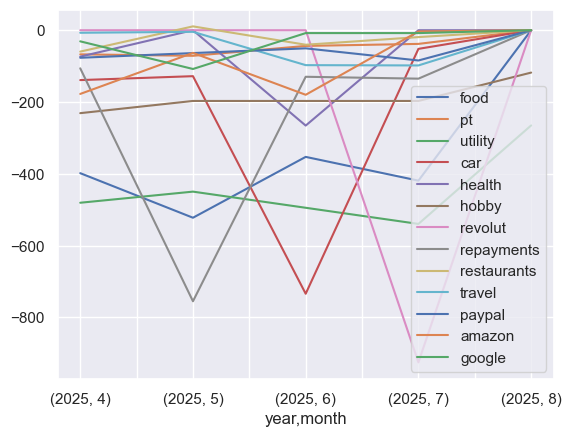

In [28]:
df3 = df2.copy()
del df3['financial']
del df3['income']
del df3['mortgage']
df3.plot()